# Taller 02 

## Cálculo de raíces

### Ejercicio 1

Encontrar todas las raíces del polinomio: $x^4 + 540x^3 + 109124x^2 + 9{,}781{,}632x + 328{,}188{,}672 = 0$

Librerías que se van a usar para el taller.

In [64]:

import numpy as np
import math


import sympy as sp


import matplotlib.pyplot as plt



Polinomio:

$$p(x)=x^4 + 540x^3 + 109124x^2 + 9781632x + 328188672.$$



Voy a definir una lista con los coeficientes del polinomio y luego usar la función np.roots para calcular las raíces del polinomio.

In [65]:

coef = [1, 540, 109124, 9781632, 328188672]

roots = np.roots(coef)
roots

array([-152.+0.00000000e+00j, -136.+0.00000000e+00j,
       -126.+2.60889445e-05j, -126.-2.60889445e-05j])

Ahora voy hacer una función que me devuelva la función polinomica del ejercicio. El código toma cada raíz que encontró antes y la mete en la función del polinomio para comprobar si realmente da 0. Si todo está bien, los resultados serán 0 o un número muy pequeño, por los pequeños errores que ocurren cuando la computadora hace cálculos con decimales. 

In [66]:

def p(x):
    return ((x**4) + 540*(x**3) + 109124*(x**2) + 9781632*x + 328188672)

vals = [p(r) for r in roots]
list(map(lambda z: complex(z), vals))

[(-2.384185791015625e-07+0j),
 (-1.1920928955078125e-07+0j),
 1.1368683772161603e-13j,
 -1.1368683772161603e-13j]

### Ejercicio 2

Intersección de la curva $(y/2)^2 = ((x+3)/2)^2 - 1$ con la recta $y=-2$



$$\left(\tfrac{-2}{2}\right)^2 = \left(\tfrac{x+3}{2}\right)^2 - 1
\Rightarrow 1 = \frac{(x+3)^2}{4} - 1\Rightarrow 2 = \frac{(x+3)^2}{4}\Rightarrow (x+3)^2 = 8\Rightarrow x = -3 \pm 2\sqrt{2}.$$

Los puntos son: $(-3-2\sqrt{2}, -2)$ y $(-3+2\sqrt{2}, -2)$.

Aquí definí una ecuación simbólica para encontrar el valor de x que la cumple.
Luego, convertí las soluciones a números decimales (float) para mostrarlas de forma más legible

In [53]:
x = sp.symbols('x', real=True)
sol = sp.solve(sp.Eq(((-2)/2)**2, ((x+3)/2)**2 - 1), x)
sol, [float(s) for s in sol]

([-5.82842712474619, -0.171572875253810],
 [-5.82842712474619, -0.1715728752538099])

### Ejercicio 3

Para $f(x)=\frac{\sin x}{x}$, hallar un $x_T$ tal que $f(x)<0.015$ para todo $x\ge x_T$


Defino una función $ f(x) = \frac{\sin(x)}{x} $ que retorna 1 cuando $ x = 0 $.  
Luego genero muchos valores de \( x \) y calculo sus correspondientes valores de \( f(x) \) para analizar su comportamiento.  
Finalmente, busco el primer punto donde la función se vuelve menor que un valor límite (*threshold*) y guardo ese \( x \) como resultado.


In [63]:
def f(x):
    return 1.0 if x == 0 else (math.sin(x)/x)

xs = np.linspace(0.1, 1000, 20000)  
ys = np.sin(xs)/xs
threshold = 0.015

idx_T = None
for i in range(len(xs)):
    if np.all(ys[i:] < threshold):
        idx_T = i
        break

x_T = xs[idx_T] if idx_T is not None else None
x_T

np.float64(64.69676983849192)

Esta línea verifica si todos los valores de $ \frac{\sin(x)}{x} $ desde idx_T en adelante son menores que *0.015* y devuelve True o False según el resultado.


In [61]:

bool(np.all((np.sin(xs)/xs)[idx_T:] < 0.015))

True

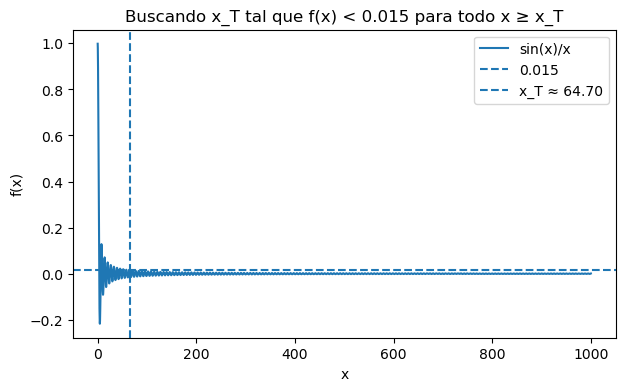

In [62]:
# Gráfico para visualizar
plt.figure(figsize=(7,4))
plt.plot(xs, ys, label='sin(x)/x')
plt.axhline(0.015, linestyle='--', label='0.015')
if x_T is not None:
    plt.axvline(x_T, linestyle='--', label=f'x_T ≈ {x_T:.2f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Buscando x_T tal que f(x) < 0.015 para todo x ≥ x_T')
plt.legend()
plt.show()
